In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification


Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
  0% 0.00/64.4M [00:00<?, ?B/s]
100% 64.4M/64.4M [00:00<00:00, 1.33GB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=100,validation_data=validation_ds)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.7514 - loss: 0.8835 - val_accuracy: 0.5000 - val_loss: 18.8429
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8175 - loss: 0.8076 - val_accuracy: 0.5000 - val_loss: 5.9725
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.8223 - loss: 0.6326 - val_accuracy: 0.5071 - val_loss: 3.6854
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.8294 - loss: 0.5677 - val_accuracy: 0.4929 - val_loss: 2.6858
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.8806 - loss: 0.4343 - val_accuracy: 0.5429 - val_loss: 1.7978
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.9112 - loss: 0.4148 - val_accuracy: 0.5429 - val_loss: 2.8612
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9049 - loss: 0.3449 - val_accuracy: 0.5714 - val_loss: 2.7553
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9151 - loss: 0.3495 - val_acc

In [ ]:
import cv2

In [ ]:
test_dog_img=cv2.imread('/content/dog')

In [ ]:
test_dog_img=cv2.resize(test_dog_img,(256,256))

In [ ]:
test_input=test_dog_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step


array([[1.]], dtype=float32)

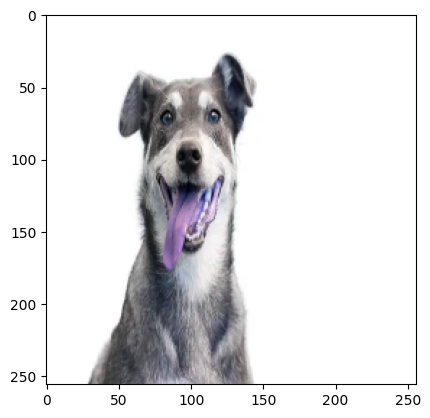

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_dog_img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')